In [329]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

import re

In [330]:
s = 'colorless'
s_new = s[0:4]+'u'+s[4:]
s_new

'colourless'

In [331]:
'airplanes'[:-1]

'airplane'

#### ???

In [332]:
string = 'abcdefghijklmnopqrstuvwxyz'
string[0:10:2]

'acegi'

Reverse

In [333]:
string[25:10:-2]

'zxvtrpnl'

In [334]:
string[::-1]

'zyxwvutsrqponmlkjihgfedcba'

In [335]:
sentence = 'This is a good day!'
sentence[::-1]

'!yad doog a si sihT'

In [336]:
import urllib2

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urllib2.urlopen(url).read().decode('utf8')

In [337]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()

In [338]:
tokens = word_tokenize(raw)
tokens

[u'BBC',
 u'NEWS',
 u'|',
 u'Health',
 u'|',
 u'Blondes',
 u"'to",
 u'die',
 u'out',
 u'in',
 u'200',
 u"years'",
 u'NEWS',
 u'SPORT',
 u'WEATHER',
 u'WORLD',
 u'SERVICE',
 u'A-Z',
 u'INDEX',
 u'SEARCH',
 u'You',
 u'are',
 u'in',
 u':',
 u'Health',
 u'News',
 u'Front',
 u'Page',
 u'Africa',
 u'Americas',
 u'Asia-Pacific',
 u'Europe',
 u'Middle',
 u'East',
 u'South',
 u'Asia',
 u'UK',
 u'Business',
 u'Entertainment',
 u'Science/Nature',
 u'Technology',
 u'Health',
 u'Medical',
 u'notes',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Talking',
 u'Point',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Country',
 u'Profiles',
 u'In',
 u'Depth',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Programmes',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'SERVICES',
 u'Daily',
 u'E-mail',
 u'News',
 u'Ticker',
 u'Mobile/PDAs',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'--',
 u'-',
 u'Text',
 u'Only',
 u'Feedback',
 u'Help',
 u'EDITIONS',
 u'Change',
 

In [339]:
file_1 = open('nltk_chap3_ex.txt', 'w')
file_1.write("The 1st line of the file. ")
file_1.close()

In [340]:
file_1 = open('nltk_chap3_ex.txt', 'a') # "a" means append. This will not overwrite the original content.
file_1.write("World creates the power of nature, but not intelligence. Nor do we know if aliens really exist.")
file_1.close()

In [341]:
file_1 = open('nltk_chap3_ex.txt', 'r')
raw = file_1.read()
file_1.close()
raw

'The 1st line of the file. World creates the power of nature, but not intelligence. Nor do we know if aliens really exist.'

In [342]:
pattern = '''
(?x)
'''
nltk.regexp_tokenize(pattern, raw)

[]

In [343]:
raw = "Not too long ago this is the only place where things are right."
raw.split('o')

['N',
 't t',
 '',
 ' l',
 'ng ag',
 ' this is the ',
 'nly place where things are right.']

In [344]:
raw.split(' ')

['Not',
 'too',
 'long',
 'ago',
 'this',
 'is',
 'the',
 'only',
 'place',
 'where',
 'things',
 'are',
 'right.']

In [345]:
raw = 'Last.'
for character in raw:
    print character

L
a
s
t
.


In [346]:
word_list = ['ask', 'tesla', 'ninja' ,'supernova']
word_list.sort()
word_list

['ask', 'ninja', 'supernova', 'tesla']

In [347]:
word_list = ['ask', 'tesla', 'ninja' ,'supernova']
sorted(word_list)

['ask', 'ninja', 'supernova', 'tesla']

In [348]:
word_list

['ask', 'tesla', 'ninja', 'supernova']

15

In [349]:
print 3 * 7

21


In [350]:
print "3" * 7

3333333


In [351]:
print str(3)*7

3333333


In [352]:
print int("3")*7

21


16.

In [353]:
with open("prog.py",'w') as prog:
    prog.write("monty = 'Monty Python'")
    
prog.close()

In [354]:
from prog import monty

In [355]:
monty

'Monty Python'

17.

In [356]:
'{:6}'.format('thisisalongstring')

'thisisalongstring'

If the string is longer than assigned length, it shows everything.

In [357]:
'{:6}'.format('if')

'if    '

In [358]:
'{:>6}'.format('if')

'    if'

18.

Here let's take the inauguration speech

In [359]:
from nltk.corpus import inaugural

Let's count the "wh-" words in all the inauguration files.

In [360]:
fd = nltk.FreqDist(
                                word
                                for file_ in inaugural.fileids()
                                for word in inaugural.words(file_)
                                if re.search('^wh.*', word.lower()) 
)
fd.most_common(20)

[(u'which', 1002),
 (u'who', 356),
 (u'when', 162),
 (u'what', 143),
 (u'whole', 90),
 (u'whose', 66),
 (u'where', 62),
 (u'whether', 46),
 (u'while', 45),
 (u'When', 41),
 (u'whom', 39),
 (u'While', 31),
 (u'whatever', 25),
 (u'What', 23),
 (u'wherever', 15),
 (u'why', 13),
 (u'whilst', 11),
 (u'wholly', 9),
 (u'white', 8),
 (u'whenever', 8)]

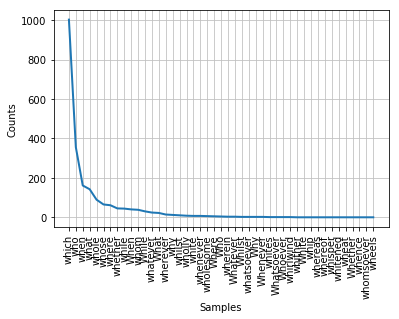

In [361]:
fd.plot()

20.

In [362]:
url = 'https://en.wikipedia.org/wiki/Basketball'

raw = urllib2.urlopen(url).read().decode('utf8')


The next step is important: tokenize the raw material from online

In [363]:
tokens = word_tokenize(raw)
tokens

[u'<',
 u'!',
 u'DOCTYPE',
 u'html',
 u'>',
 u'<',
 u'html',
 u'class=',
 u"''",
 u'client-nojs',
 u"''",
 u'lang=',
 u"''",
 u'en',
 u"''",
 u'dir=',
 u"''",
 u'ltr',
 u"''",
 u'>',
 u'<',
 u'head',
 u'>',
 u'<',
 u'meta',
 u'charset=',
 u"''",
 u'UTF-8',
 u"''",
 u'/',
 u'>',
 u'<',
 u'title',
 u'>',
 u'Basketball',
 u'-',
 u'Wikipedia',
 u'<',
 u'/title',
 u'>',
 u'<',
 u'script',
 u'>',
 u'document.documentElement.className',
 u'=',
 u'document.documentElement.className.replace',
 u'(',
 u'/',
 u'(',
 u'^|\\s',
 u')',
 u'client-nojs',
 u'(',
 u'\\s|',
 u'$',
 u')',
 u'/',
 u',',
 u'``',
 u'$',
 u'1client-js',
 u'$',
 u'2',
 u"''",
 u')',
 u';',
 u'<',
 u'/script',
 u'>',
 u'<',
 u'script',
 u'>',
 u'(',
 u'window.RLQ=window.RLQ||',
 u'[',
 u']',
 u')',
 u'.push',
 u'(',
 u'function',
 u'(',
 u')',
 u'{',
 u'mw.config.set',
 u'(',
 u'{',
 u'``',
 u'wgCanonicalNamespace',
 u"''",
 u':',
 u"''",
 u"''",
 u',',
 u"''",
 u'wgCanonicalSpecialPageName',
 u"''",
 u':',
 u'false',
 u',',
 u

Or, use BeautifulSoup to get the text

In [364]:
from bs4 import BeautifulSoup

In [365]:
text = BeautifulSoup(raw).get_text()
text

u'\n\n\nBasketball - Wikipedia\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );\n(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Basketball","wgTitle":"Basketball","wgCurRevisionId":774953537,"wgRevisionId":774953537,"wgArticleId":3921,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from October 2016","Articles with permanently dead external links","Webarchive template wayback links","Articles with dead external links from June 2016","Wikipedia indefinitely semi-protected pages","Wikipedia indefinitely move-protected pages","Use mdy dates from June 2011","All articles with unsourced statements","Articles with unsourced statements from April 2017","Articles with l

In [366]:
tokens = word_tokenize(text)
tokens

[u'Basketball',
 u'-',
 u'Wikipedia',
 u'document.documentElement.className',
 u'=',
 u'document.documentElement.className.replace',
 u'(',
 u'/',
 u'(',
 u'^|\\s',
 u')',
 u'client-nojs',
 u'(',
 u'\\s|',
 u'$',
 u')',
 u'/',
 u',',
 u'``',
 u'$',
 u'1client-js',
 u'$',
 u'2',
 u"''",
 u')',
 u';',
 u'(',
 u'window.RLQ=window.RLQ||',
 u'[',
 u']',
 u')',
 u'.push',
 u'(',
 u'function',
 u'(',
 u')',
 u'{',
 u'mw.config.set',
 u'(',
 u'{',
 u'``',
 u'wgCanonicalNamespace',
 u"''",
 u':',
 u"''",
 u"''",
 u',',
 u"''",
 u'wgCanonicalSpecialPageName',
 u"''",
 u':',
 u'false',
 u',',
 u"''",
 u'wgNamespaceNumber',
 u"''",
 u':0',
 u',',
 u"''",
 u'wgPageName',
 u"''",
 u':',
 u"''",
 u'Basketball',
 u"''",
 u',',
 u"''",
 u'wgTitle',
 u"''",
 u':',
 u"''",
 u'Basketball',
 u"''",
 u',',
 u"''",
 u'wgCurRevisionId',
 u"''",
 u':774953537',
 u',',
 u"''",
 u'wgRevisionId',
 u"''",
 u':774953537',
 u',',
 u"''",
 u'wgArticleId',
 u"''",
 u':3921',
 u',',
 u"''",
 u'wgIsArticle',
 u"''",
 u'

21.

In [367]:
word_list_english = nltk.corpus.words.words('en')
word_list_english[:5]

[u'A', u'a', u'aa', u'aal', u'aalii']

!!! Use .isalpha() to filter words only

In [368]:
word_only_list_web = [word for word in tokens if word.isalpha()]
word_only_list_web

[u'Basketball',
 u'Wikipedia',
 u'function',
 u'wgCanonicalNamespace',
 u'wgCanonicalSpecialPageName',
 u'false',
 u'wgNamespaceNumber',
 u'wgPageName',
 u'Basketball',
 u'wgTitle',
 u'Basketball',
 u'wgCurRevisionId',
 u'wgRevisionId',
 u'wgArticleId',
 u'wgIsArticle',
 u'true',
 u'wgIsRedirect',
 u'false',
 u'wgAction',
 u'view',
 u'wgUserName',
 u'null',
 u'wgUserGroups',
 u'wgCategories',
 u'All',
 u'articles',
 u'with',
 u'dead',
 u'external',
 u'links',
 u'Articles',
 u'with',
 u'dead',
 u'external',
 u'links',
 u'from',
 u'October',
 u'Articles',
 u'with',
 u'permanently',
 u'dead',
 u'external',
 u'links',
 u'Webarchive',
 u'template',
 u'wayback',
 u'links',
 u'Articles',
 u'with',
 u'dead',
 u'external',
 u'links',
 u'from',
 u'June',
 u'Wikipedia',
 u'indefinitely',
 u'pages',
 u'Wikipedia',
 u'indefinitely',
 u'pages',
 u'Use',
 u'mdy',
 u'dates',
 u'from',
 u'June',
 u'All',
 u'articles',
 u'with',
 u'unsourced',
 u'statements',
 u'Articles',
 u'with',
 u'unsourced',
 u'st

In [369]:
word_not_in_corpus = [word.lower() for word in word_only_list_web 
                      if word.lower() not in word_list_english]
word_not_in_corpus

[u'wikipedia',
 u'wgcanonicalnamespace',
 u'wgcanonicalspecialpagename',
 u'wgnamespacenumber',
 u'wgpagename',
 u'wgtitle',
 u'wgcurrevisionid',
 u'wgrevisionid',
 u'wgarticleid',
 u'wgisarticle',
 u'wgisredirect',
 u'wgaction',
 u'wgusername',
 u'wgusergroups',
 u'wgcategories',
 u'articles',
 u'articles',
 u'october',
 u'articles',
 u'webarchive',
 u'articles',
 u'wikipedia',
 u'pages',
 u'wikipedia',
 u'pages',
 u'mdy',
 u'dates',
 u'articles',
 u'unsourced',
 u'statements',
 u'articles',
 u'unsourced',
 u'statements',
 u'april',
 u'articles',
 u'articles',
 u'references',
 u'april',
 u'articles',
 u'references',
 u'articles',
 u'unsourced',
 u'statements',
 u'january',
 u'articles',
 u'july',
 u'articles',
 u'january',
 u'articles',
 u'references',
 u'november',
 u'articles',
 u'dmoz',
 u'wikipedia',
 u'articles',
 u'lccn',
 u'identifiers',
 u'wikipedia',
 u'articles',
 u'gnd',
 u'identifiers',
 u'articles',
 u'containing',
 u'introductions',
 u'canadian',
 u'inventions',
 u'origi

In [371]:
fd = nltk.FreqDist(word_not_in_corpus)
fd.most_common(20)

[(u'players', 66),
 (u'games', 59),
 (u'retrieved', 57),
 (u'women', 54),
 (u'rules', 53),
 (u'teams', 51),
 (u'nba', 50),
 (u'fiba', 46),
 (u'played', 44),
 (u'states', 26),
 (u'articles', 26),
 (u'july', 26),
 (u'american', 24),
 (u'feet', 24),
 (u'has', 23),
 (u'naismith', 23),
 (u'called', 23),
 (u'dribbling', 21),
 (u'leagues', 21),
 (u'archived', 20)]

Most words are in a slightly different form compared with corpus words. e.g. player vs. players, etc.

Sort the result. Sorting result in the nltk.FreqDist as follow:

In [383]:
fd_sorted = sorted(fd, key=fd.get, reverse=True)